In [1]:
import os

## 이미지 데이터 train_test_split
import shutil
from glob import glob
from sklearn.model_selection import train_test_split

## 바운딩박스 생성
import cv2, PIL
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

## yolov5 model 학습 및 테스트
import yaml
# from IPython.display import Image

In [2]:
## 현재 경로 확인
os.getcwd()

'/Users/iyujin/develop/git_repo_folder/LastProject/식물인식/최종 결과 자료 정리/최종모델 yolov5s'

In [3]:
## 식물 이미지 데이터 확인
original_dataset_dir = '../RowData/'

folder_list = []
for path_ in os.listdir(original_dataset_dir):
    if path_.startswith('.'):
        pass
    else:
        path2 = original_dataset_dir + path_
        folder_list.append(path_)
        
print(folder_list)

plant_cnt = {}
for path in folder_list:
    plant_cnt[path] = len(os.listdir(original_dataset_dir+path))
    
print(plant_cnt)

['orangejasmin', 'benghaltree', 'stuckyi', 'rosmari', 'ivy', 'geumjeonsoo', 'yeoincho', 'wilma', 'skindapsus', 'sansevieria', 'hongkong', 'sanhosoo', 'gaewoonjuk', 'tableyaja', 'hangwoonmok', 'monstera']
{'orangejasmin': 1486, 'benghaltree': 1683, 'stuckyi': 1460, 'rosmari': 1328, 'ivy': 983, 'geumjeonsoo': 1508, 'yeoincho': 1397, 'wilma': 1526, 'skindapsus': 1368, 'sansevieria': 1168, 'hongkong': 1431, 'sanhosoo': 1000, 'gaewoonjuk': 1559, 'tableyaja': 990, 'hangwoonmok': 1254, 'monstera': 1665}


In [4]:
## 식물 이미지 총 갯수 확인
img_list = glob('../RowData/*/*') 
len(img_list)

21805

In [5]:
## 학습데이터와 테스트 데이터로 나누기 (test_size 조절을 통해 비율 조정)
train_img_list, test_img_list = train_test_split(img_list, test_size=0.2, random_state=40)

## 학습데이터와 검증데이터 나누기 
train_img_list, val_img_list = train_test_split(train_img_list, test_size=0.2, random_state=40)
print('train',len(train_img_list), '\nvalid',len(val_img_list),  '\ntest',len(test_img_list))

train 13955 
valid 3489 
test 4361


In [6]:
## github에서 yolov5 model 불러오기
!git clone https://github.com/ultralytics/yolov5.git 

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [7]:
cd yolov5

/Users/iyujin/develop/git_repo_folder/LastProject/식물인식/최종 결과 자료 정리/최종모델 yolov5s/yolov5


In [8]:
## 현재 경로 한번 더 확인
os.getcwd()

'/Users/iyujin/develop/git_repo_folder/LastProject/식물인식/최종 결과 자료 정리/최종모델 yolov5s/yolov5'

In [9]:
## yolo 학습, 검증, 테스트 이미지 넣을 폴더 생성
origin_dir = 'datasets_yolo' ## root path
# os.mkdir(origin_dir)

image_dir = os.path.join(origin_dir,'images') ## images path
# os.mkdir(image_dir)

label_dir = os.path.join(origin_dir,'labels') ## labels path
# os.mkdir(label_dir)

In [10]:
## 이미지 폴더 생성
train_img_dir = os.path.join(image_dir,'train')
valid_img_dir = os.path.join(image_dir,'valid')
test_img_dir = os.path.join(image_dir,'test')
# os.mkdir(train_img_dir)
# os.mkdir(valid_img_dir)
# os.mkdir(test_img_dir)

## 라벨 폴더 생성
train_lab_dir = os.path.join(label_dir,'train')
valid_lab_dir = os.path.join(label_dir,'valid')
test_lab_dir = os.path.join(label_dir,'test')
# os.mkdir(train_lab_dir)
# os.mkdir(valid_lab_dir)
# os.mkdir(test_lab_dir)

In [11]:
## 각 폴더에 이미지 데이터 복사
for train_img in train_img_list:
    shutil.copy(train_img,train_img_dir)
    
for valid_img in val_img_list:
    shutil.copy(valid_img,valid_img_dir)
    
for test_img in test_img_list:
    shutil.copy(test_img,test_img_dir)

In [12]:
print(len(os.listdir(valid_img_dir))+len(os.listdir(test_img_dir))+len(os.listdir(train_img_dir)))
len(os.listdir(train_img_dir)), len(os.listdir(valid_img_dir)),len(os.listdir(test_img_dir))

21806


(13955, 3489, 4362)

In [13]:
## 이미지 중심 찾기
def center_point(im):
    immat = im.load()
    (X, Y) = im.size
    m = np.zeros((X, Y))

    for x in range(X):
        for y in range(Y):
            m[x, y] = immat[(x, y)] != (255, 255, 255)
    m = m / np.sum(np.sum(m))

    dx = np.sum(m, 1)
    dy = np.sum(m, 0)

    # expected values
    cx = np.sum(dx * np.arange(X))
    cy = np.sum(dy * np.arange(Y))
    
    return int(cx),int(cy)

In [14]:
def absolut(width, height):
    ## 이미지 커지면 바운딩 박스 길이도 길어지게 설정 
    Absolut_w = width * 0.8
    Absolut_h = height * 0.8
        
    return Absolut_w,Absolut_h

In [15]:
cd ..

/Users/iyujin/develop/git_repo_folder/LastProject/식물인식/최종 결과 자료 정리/최종모델 yolov5s


../RowData/stuckyi/stuckyi2835.png
272.0 362.40000000000003
340 453
0.497059 0.496689 0.8 0.8


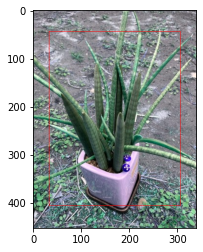

In [16]:
## 임의로 바운딩박스 만들기 
## 이미지의 중심 (center_x, center_y)을 기준으로 너비와 높이 100 길이의 바운딩박스 그려주기 

for train_img in train_img_list:
#     print(train_img)
    image = PIL.Image.open(train_img)
    
    # width, height
    width, height = image.size
    # center x, y point
    cx,cy = center_point(image)
    
    Absolut_w,Absolut_h = absolut(width, height)
    
    xw, yw = np.round(cx/width,6) , np.round(cy/height,6)
    ww, hh = np.round(Absolut_w/width,6) , np.round(Absolut_h/height,6)
    
#     print(xw,yw, ww, hh)
    
    w2, h2 = int(Absolut_w/2), int(Absolut_h/2)
    
    im = cv2.imread(train_img)
    img = cv2.rectangle(im, (cx-w2, cy+h2), (cx+w2, cy-h2), (255,0,0), 1)
    
    ## 라벨링 파일에 들어갈 정규화된 바운딩박스 포인터들이 1보다 큰 경우가 있는지 확인 (라벨링 값은 0~1 사이의 값이어야 한다.)
    print(train_img)
    print(Absolut_w, Absolut_h)
    print(width, height)
    print(xw,yw, ww, hh)
    plt.imshow(img)
    plt.show()
    
## 임의의 바운딩박스가 식물을 잘 포함한 것을 볼 수 있음

In [17]:
plant_dic ={'orangejasmin':0, 'benghaltree':1, 'stuckyi':2, 'rosmari':3, 'ivy':4, 'geumjeonsoo':5,
            'yeoincho':6, 'wilma':7, 'skindapsus':8, 'sansevieria':9, 'hongkong':10, 'sanhosoo':11, 
            'gaewoonjuk':12, 'tableyaja':13, 'hangwoonmok':14, 'monstera':15}

In [18]:
## train labeling txt
for train_img in train_img_list:
    image = PIL.Image.open(train_img)
    # width, height
    width, height = image.size
    #center x, y point
    cx,cy = center_point(image)
    
    Absolut_w,Absolut_h = absolut(width, height)
    
    xw, yw = np.round(cx/width,6) , np.round(cy/height,6)
    ww, hh = np.round(Absolut_w/width,6) , np.round(Absolut_h/height,6)
    
    name = train_img.split('/')[2]
    txt_name = train_img.split('/')[3][:-4]
    class_num = plant_dic[name]
    
    ## 각 폴더에 라벨링 데이터 넣기 
    f = open(f'./datasets_yolo/labels/train/{txt_name}.txt','w')
    f.write(f'{class_num} {xw} {yw} {ww} {hh}')
    f.close()
    if xw>1 or yw>1 or ww>1 or hh>1 :
        print(train_img)
#     print(class_num,xw,yw,ww,hh)

In [19]:
## valid labeling txt
for val_img in val_img_list:
    image = PIL.Image.open(val_img)
    # width, height
    width, height = image.size
    #center x, y point
    cx,cy = center_point(image)
    
    Absolut_w,Absolut_h = absolut(width, height)
    
    xw, yw = np.round(cx/width,6) , np.round(cy/height,6)
    ww, hh = np.round(Absolut_w/width,6) , np.round(Absolut_h/height,6)
    
    name = val_img.split('/')[2]
    txt_name = val_img.split('/')[3][:-4]
    class_num = plant_dic[name]
    
    ## 각 폴더에 라벨링 데이터 넣기 
    f = open(f'./datasets_yolo/labels/valid/{txt_name}.txt','w')
    f.write(f'{class_num} {xw} {yw} {ww} {hh}')
    f.close()
    if xw>1 or yw>1 or ww>1 or hh>1 :
        print(val_img)
#     print(class_num,xw,yw,ww,hh)

In [20]:
## valid labeling txt
for test_img in test_img_list:
    image = PIL.Image.open(test_img)
    # width, height
    width, height = image.size
    #center x, y point
    cx,cy = center_point(image)
    
    Absolut_w,Absolut_h = absolut(width, height)
    
    xw, yw = np.round(cx/width,6) , np.round(cy/height,6)
    ww, hh = np.round(Absolut_w/width,6) , np.round(Absolut_h/height,6)
    
    name = test_img.split('/')[2]
    txt_name = test_img.split('/')[3][:-4]
    class_num = plant_dic[name]
    
    ## 각 폴더에 라벨링 데이터 넣기 
    f = open(f'./datasets_yolo/labels/test/{txt_name}.txt','w')
    f.write(f'{class_num} {xw} {yw} {ww} {hh}')
    f.close()
    if xw>1 or yw>1 or ww>1 or hh>1 :
        print(test_img)
#     print(class_num,xw,yw,ww,hh)

In [22]:
os.getcwd()

'/Users/iyujin/develop/git_repo_folder/LastProject/식물인식/최종 결과 자료 정리/최종모델 yolov5s'

In [23]:
cd yolov5

/Users/iyujin/develop/git_repo_folder/LastProject/식물인식/최종 결과 자료 정리/최종모델 yolov5s/yolov5


In [24]:
## datasets.yaml 만들어주고 확인 
with open('./data/datasets.yaml','r') as f:
    data = yaml.full_load(f)
    
print(data)

{'path': './datasets_yolo/', 'train': 'images/train', 'val': 'images/valid', 'test': 'images/test', 'nc': 16, 'names': ['orangejasmin', 'benghaltree', 'stuckyi', 'rosmari', 'ivy', 'geumjeonsoo', 'yeoincho', 'wilma', 'skindapsus', 'sansevieria', 'hongkong', 'sanhosoo', 'gaewoonjuk', 'tableyaja', 'hangwoonmok', 'monstera']}


In [25]:
## yolov5 전이학습
import timeit
start = timeit.default_timer()

!python train.py --img 224 --batch 20 --epochs 20 --data data/datasets.yaml --cfg ./models/yolov5s.yaml --weights yolov5s.pt --name yolov5s_results

end = timeit.default_timer()
print(end-start)

In [26]:
!python val.py --img 224 --batch 60 --data data/datasets.yaml --weights runs/train/yolov5s_results/weights/best.pt

val: data=data/datasets.yaml, weights=['runs/train/yolov5s_results/weights/best.pt'], batch_size=60, imgsz=224, conf_thres=0.001, iou_thres=0.6, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
fatal: cannot change to '/Users/iyujin/develop/git_repo_folder/LastProject/식물인식/최종': No such file or directory
YOLOv5 🚀 2022-5-8 torch 1.9.0.post2 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7053277 parameters, 0 gradients, 15.9 GFLOPs
val: Scanning '/Users/iyujin/develop/git_repo_folder/LastProject/식물인시
val: New cache created: /Users/iyujin/develop/git_repo_folder/LastProject/식물인식/최종 결과 자료 정리/최종모델 yolov5s/yolov5/datasets_yolo/labels/valid.cache
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all       3489       3489      0.941      0.924      0.961       0.89
        orangeja

In [29]:
test_img_path = '/Users/iyujin/Downloads/여인초.jpeg'
!python detect.py --weights runs/train/yolov5s_results/weights/best.pt --img 224 --conf 0.5 --source "{test_img_path}"

detect: weights=['runs/train/yolov5s_results/weights/best.pt'], source=/Users/iyujin/Downloads/여인초.jpeg, data=data/coco128.yaml, imgsz=[224, 224], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
fatal: cannot change to '/Users/iyujin/develop/git_repo_folder/LastProject/식물인식/최종': No such file or directory
YOLOv5 🚀 2022-5-8 torch 1.9.0.post2 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7053277 parameters, 0 gradients, 15.9 GFLOPs
image 1/1 /Users/iyujin/Downloads/여인초.jpeg: 224x192 1 yeoincho, Done. (0.054s)
Speed: 0.1ms pre-process, 53.9ms inference, 0.4ms NMS per image at shape (1, 3, 224, 224)
Results saved to runs/detect/exp3
save_dir: runs/detect/exp3

pred_name :  yeoincho  
true :  여인초.jpeg